1) Boolean Gates using Perceptron

In [1]:
import numpy as np

def unitStep(v):
    return 1 if v >= 0 else 0

def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

def AND_logicFunction(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptronModel(x, w, b)

def OR_logicFunction(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptronModel(x, w, b)

def NAND_logicFunction(x):
    w = np.array([-1, -1])
    b = 1.5
    return perceptronModel(x, w, b)

def NOR_logicFunction(x):
    w = np.array([-1, -1])
    b = 0.5
    return perceptronModel(x, w, b)

def NOT_logicFunction(x):
    w = np.array([-2])
    b = 1
    return perceptronModel(x, w, b)

def XOR_logicFunction(x):
    not_x1 = NOT_logicFunction([x[0]])
    not_x2 = NOT_logicFunction([x[1]])
    and1 = AND_logicFunction([not_x1, x[1]])
    and2 = AND_logicFunction([x[0], not_x2])
    return OR_logicFunction([and1, and2])

test_cases = [np.array([0, 1]), np.array([1, 1]), np.array([0, 0]), np.array([1, 0])]

print("AND Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {AND_logicFunction(x)}")

print("OR Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {OR_logicFunction(x)}")

print("NAND Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {NAND_logicFunction(x)}")

print("NOR Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {NOR_logicFunction(x)}")

print("NOT Gate:")
for x in [0, 1]:
    print(f"Input: {x}, Output: {NOT_logicFunction([x])}")

print("XOR Gate:")
for x in test_cases:
    print(f"Input: {x}, Output: {XOR_logicFunction(x)}")


AND Gate:
Input: [0 1], Output: 0
Input: [1 1], Output: 1
Input: [0 0], Output: 0
Input: [1 0], Output: 0
OR Gate:
Input: [0 1], Output: 1
Input: [1 1], Output: 1
Input: [0 0], Output: 0
Input: [1 0], Output: 1
NAND Gate:
Input: [0 1], Output: 1
Input: [1 1], Output: 0
Input: [0 0], Output: 1
Input: [1 0], Output: 1
NOR Gate:
Input: [0 1], Output: 0
Input: [1 1], Output: 0
Input: [0 0], Output: 1
Input: [1 0], Output: 0
NOT Gate:
Input: 0, Output: 1
Input: 1, Output: 0
XOR Gate:
Input: [0 1], Output: 1
Input: [1 1], Output: 0
Input: [0 0], Output: 0
Input: [1 0], Output: 1


2) Stochastic and Batch GD


Epoch 1 (SGD):
 Updated weights: [0.84964334 0.38321615], Updated bias: -0.5113838135896644

Epoch 2 (SGD):
 Updated weights: [0.82439068 0.25695286], Updated bias: -0.5618891331974448

Epoch 3 (SGD):
 Updated weights: [0.8033537  0.15176797], Updated bias: -0.6039630864648714

Epoch 4 (SGD):
 Updated weights: [0.7861453  0.06572597], Updated bias: -0.6383798862740782

Epoch 5 (SGD):
 Updated weights: [ 0.77215715 -0.00421477], Updated bias: -0.666356184798451

Epoch 6 (SGD):
 Updated weights: [ 0.76076693 -0.06116589], Updated bias: -0.6891366313129782

Epoch 7 (SGD):
 Updated weights: [ 0.75143742 -0.10781345], Updated bias: -0.7077956541325661

Epoch 8 (SGD):
 Updated weights: [ 0.74373865 -0.14630727], Updated bias: -0.7231931850150136

Epoch 9 (SGD):
 Updated weights: [ 0.73733697 -0.17831569], Updated bias: -0.7359965505791436

Epoch 10 (SGD):
 Updated weights: [ 0.73197564 -0.20512234], Updated bias: -0.7467192124756975

Epoch 1 (Batch GD):
 Updated weights: [ 0.07191782 -0.743

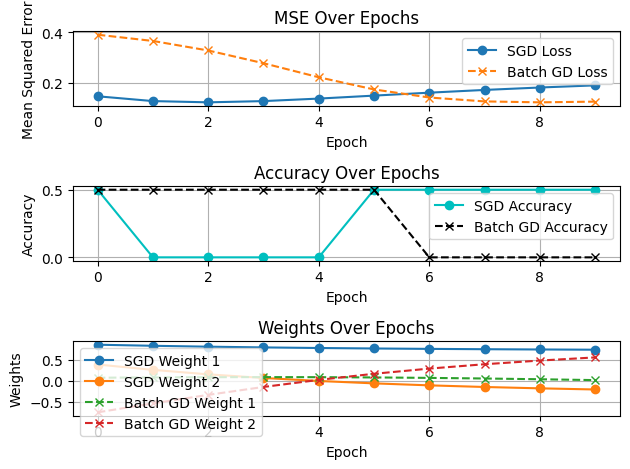


Final Results:
SGD: Final weights: [ 0.73197564 -0.20512234], Final bias: -0.7467192124756975
Batch GD: Final weights: [0.01577729 0.55058484], Final bias: -0.794611714662396


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(x, w, b):
    return np.dot(x, w) + b

def sigmoid(y_in):
    return 1 / (1 + np.exp(-y_in))

def update_weights(c, y, y_hat, x):
    return c * (y_hat - y) * x

def update_bias(c, y, y_hat):
    return c * (y_hat - y)

def compute_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def compute_accuracy(y, y_hat, threshold=0.2):
    predictions = (abs(y - y_hat) < threshold).astype(int)
    return np.mean(predictions)

def sgd(x, y, epochs, alpha):
    w, b = np.random.randn(x.shape[1]), np.random.randn()
    weights, biases, losses, accuracies = [], [], [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} (SGD):")
        for xi, yi in zip(x, y):
            y_hat = sigmoid(perceptron(xi, w, b))
            dw = update_weights(1, yi, y_hat, xi)
            db = update_bias(1, yi, y_hat)
            w -= alpha * dw
            b -= alpha * db
            print(f" Updated weights: {w}, Updated bias: {b}")

        y_hat_total = sigmoid(perceptron(x, w, b))
        weights.append(w.copy()), biases.append(b)
        losses.append(compute_loss(y, y_hat_total))
        accuracies.append(compute_accuracy(y, y_hat_total))

    return np.array(weights), np.array(biases), np.array(losses), np.array(accuracies)

def batch_gd(x, y, epochs, alpha):
    w, b = np.random.randn(x.shape[1]), np.random.randn()
    weights, biases, losses, accuracies = [], [], [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} (Batch GD):")
        y_hat = sigmoid(perceptron(x, w, b))
        dw = np.mean(update_weights(1, y, y_hat, x), axis=0)
        db = np.mean(update_bias(1, y, y_hat))
        w -= alpha * dw
        b -= alpha * db
        print(f" Updated weights: {w}, Updated bias: {b}")

        weights.append(w.copy()), biases.append(b)
        losses.append(compute_loss(y, y_hat))
        accuracies.append(compute_accuracy(y, y_hat))

    return np.array(weights), np.array(biases), np.array(losses), np.array(accuracies)

x = np.array([[0.5, 2.5]])
y = np.array([0.2, 0.9])
epochs, alpha = 10, 0.1

weights_sgd, biases_sgd, losses_sgd, accuracies_sgd = sgd(x, y, epochs, alpha)
weights_batch, biases_batch, losses_batch, accuracies_batch = batch_gd(x, y, epochs, alpha)

plt.subplot(3, 1, 1)
plt.plot(losses_sgd, marker='o', label='SGD Loss')
plt.plot(losses_batch, marker='x', linestyle='--', label='Batch GD Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Epochs')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(3, 1, 2)
plt.plot(accuracies_sgd, marker='o', color='c', label='SGD Accuracy')
plt.plot(accuracies_batch, marker='x', linestyle='--', color='k', label='Batch GD Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)

# Weight plot
plt.subplot(3, 1, 3)
for i in range(weights_sgd.shape[1]):
    plt.plot(weights_sgd[:, i], marker='o', label=f'SGD Weight {i+1}')
for i in range(weights_batch.shape[1]):
    plt.plot(weights_batch[:, i], marker='x', linestyle='--', label=f'Batch GD Weight {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.title('Weights Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal Results:")
print(f"SGD: Final weights: {weights_sgd[-1]}, Final bias: {biases_sgd[-1]}")
print(f"Batch GD: Final weights: {weights_batch[-1]}, Final bias: {biases_batch[-1]}")


3) Backpropagation

Epoch 1/1000 - MSE: 0.2775, Accuracy: 0.3524
Epoch 101/1000 - MSE: 0.1123, Accuracy: 0.8381
Epoch 201/1000 - MSE: 0.0842, Accuracy: 0.8857
Epoch 301/1000 - MSE: 0.0675, Accuracy: 0.9238
Epoch 401/1000 - MSE: 0.0539, Accuracy: 0.9333
Epoch 501/1000 - MSE: 0.0432, Accuracy: 0.9429
Epoch 601/1000 - MSE: 0.0352, Accuracy: 0.9619
Epoch 701/1000 - MSE: 0.0295, Accuracy: 0.9619
Epoch 801/1000 - MSE: 0.0255, Accuracy: 0.9619
Epoch 901/1000 - MSE: 0.0226, Accuracy: 0.9524


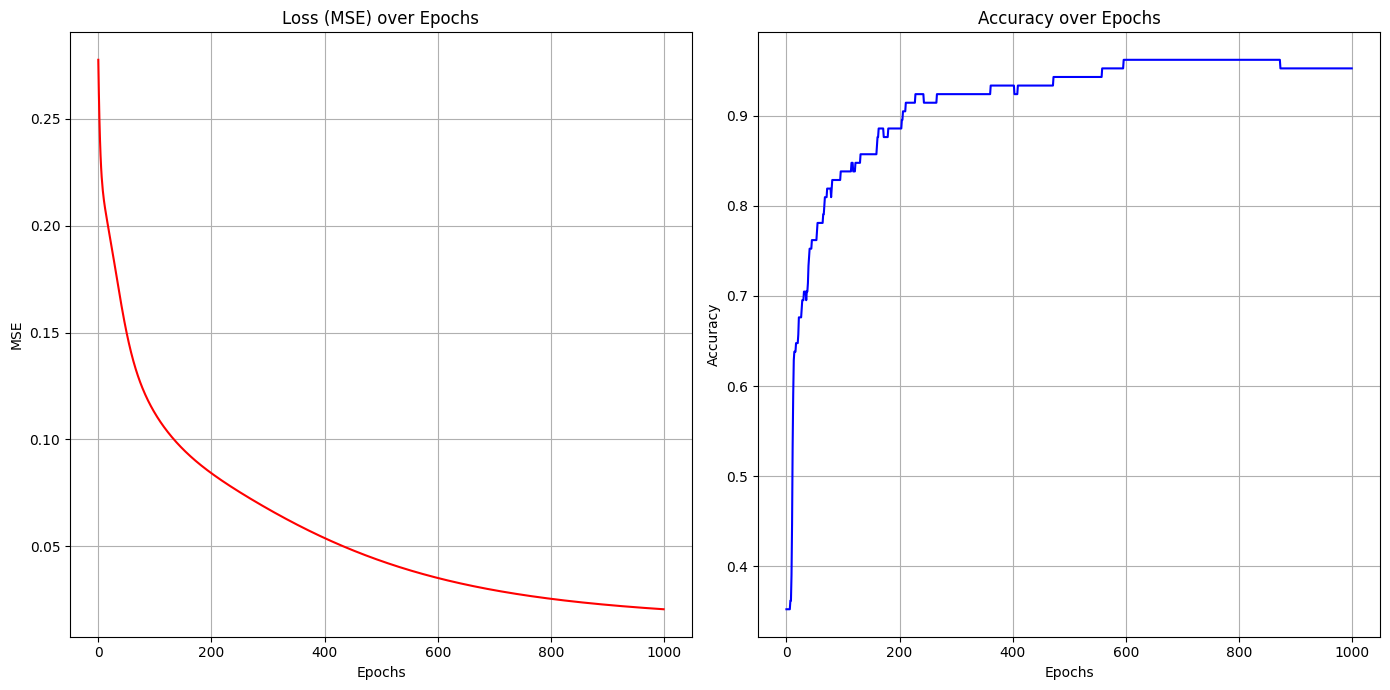

Test Accuracy: 0.9778

--- Evaluation ---
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-hot encoding for the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 5  # Number of neurons in the hidden layer
output_size = y_train.shape[1]  # Number of output classes
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
W1 = np.random.rand(input_size, hidden_size) - 0.5
b1 = np.random.rand(1, hidden_size) - 0.5
W2 = np.random.rand(hidden_size, output_size) - 0.5
b2 = np.random.rand(1, output_size) - 0.5

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def forward_propagation(X, W1, W2, b1, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Backpropagation function
def backward_propagation(X, y, Z1, A1, A2, W2):
    error = y - A2
    dZ2 = error * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    return dW1, dW2, db1, db2, error

# Training the neural network
mse_history = []
accuracy_history = []

for epoch in range(epochs):
    # Feedforward and backpropagation
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, W2, b1, b2)
    dW1, dW2, db1, db2, error = backward_propagation(X_train, y_train, Z1, A1, A2, W2)

    # Calculate Mean Squared Error
    mse = np.mean(np.square(error))
    mse_history.append(mse)

    # Update weights and biases
    W1 += learning_rate * dW1
    W2 += learning_rate * dW2
    b1 += learning_rate * db1
    b2 += learning_rate * db2

    # Evaluate accuracy on the training set
    predictions = np.argmax(A2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == labels)
    accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs} - MSE: {mse:.4f}, Accuracy: {accuracy:.4f}")

# Plot Loss and Accuracy over Epochs
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), mse_history, label="Mean Squared Error", color="red")
plt.title("Loss (MSE) over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_history, label="Accuracy", color="blue")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

plt.tight_layout()
plt.show()

# Evaluate on the test set
Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, W2, b1, b2)

test_predictions = np.argmax(A2_test, axis=1)
test_labels = np.argmax(y_test, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)

print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report and Confusion Matrix
print("\n--- Evaluation ---")
print("Classification Report:")
print(classification_report(test_labels, test_predictions, target_names=iris.target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, test_predictions))


backup backpropgation

Epoch 0: Train Loss = 0.2592, Test Accuracy = 0.1667
Epoch 100: Train Loss = 0.0965, Test Accuracy = 0.9000
Epoch 200: Train Loss = 0.0733, Test Accuracy = 0.9667
Epoch 300: Train Loss = 0.0543, Test Accuracy = 0.9667
Epoch 400: Train Loss = 0.0382, Test Accuracy = 1.0000
Epoch 500: Train Loss = 0.0279, Test Accuracy = 1.0000
Epoch 600: Train Loss = 0.0222, Test Accuracy = 0.9667
Epoch 700: Train Loss = 0.0190, Test Accuracy = 0.9667
Epoch 800: Train Loss = 0.0171, Test Accuracy = 0.9667
Epoch 900: Train Loss = 0.0158, Test Accuracy = 0.9667


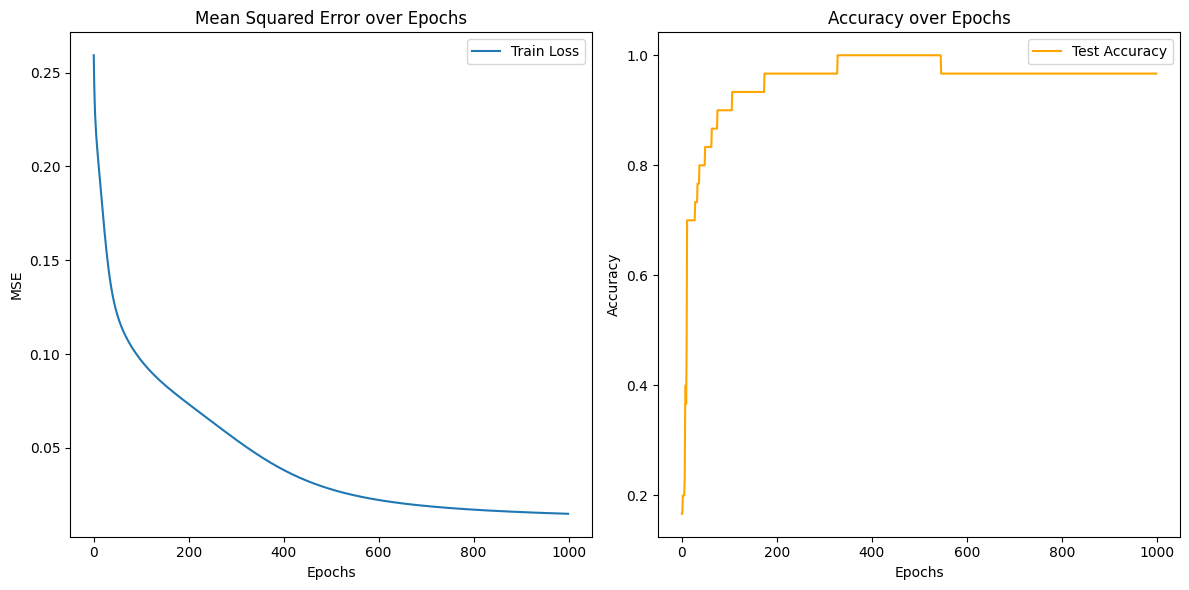


--- Evaluation ---
Test Accuracy: 0.9667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-hot encoding for the labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 10  # Number of neurons in the hidden layer
output_size = y_train.shape[1]  # Number of output classes
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size) - 0.5
bias_hidden = np.random.rand(hidden_size) - 0.5
weights_hidden_output = np.random.rand(hidden_size, output_size) - 0.5
bias_output = np.random.rand(output_size) - 0.5

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feedforward(X):
    global hidden_input, hidden_output, final_input, final_output
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    return final_output

# Backpropagation function
def backpropagation(X, y):
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
    # Calculate errors
    output_error = final_output - y
    output_delta = output_error * sigmoid_derivative(final_output)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, output_delta)
    bias_output -= learning_rate * np.sum(output_delta, axis=0)

    weights_input_hidden -= learning_rate * np.dot(X.T, hidden_delta)
    bias_hidden -= learning_rate * np.sum(hidden_delta, axis=0)

    return np.mean(np.square(output_error))  # Mean squared error

# Training the neural network
train_errors = []
test_accuracies = []

for epoch in range(epochs):
    # Feedforward and backpropagation
    feedforward(X_train)
    train_loss = backpropagation(X_train, y_train)
    train_errors.append(train_loss)

    # Evaluate on test data
    test_predictions = feedforward(X_test)
    test_accuracy = np.mean(np.argmax(test_predictions, axis=1) == np.argmax(y_test, axis=1))
    test_accuracies.append(test_accuracy)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

# Plot Mean Squared Error
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_errors, label="Train Loss")
plt.title("Mean Squared Error over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), test_accuracies, label="Test Accuracy", color='orange')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Predict on test data
final_predictions = feedforward(X_test)
predicted_labels = np.argmax(final_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print("\n--- Evaluation ---")
print(f"Test Accuracy: {np.mean(predicted_labels == true_labels):.4f}")
print("Confusion Matrix:")
confusion_matrix = np.zeros((output_size, output_size), dtype=int)
for t, p in zip(true_labels, predicted_labels):
    confusion_matrix[t, p] += 1
print(confusion_matrix)


Epoch 0: Train Loss = 0.2452, Test Accuracy = 0.5000
Epoch 100: Train Loss = 0.0878, Test Accuracy = 0.9333
Epoch 200: Train Loss = 0.0641, Test Accuracy = 0.9667
Epoch 300: Train Loss = 0.0440, Test Accuracy = 1.0000
Epoch 400: Train Loss = 0.0307, Test Accuracy = 1.0000
Epoch 500: Train Loss = 0.0235, Test Accuracy = 1.0000
Epoch 600: Train Loss = 0.0196, Test Accuracy = 0.9667
Epoch 700: Train Loss = 0.0174, Test Accuracy = 0.9667
Epoch 800: Train Loss = 0.0160, Test Accuracy = 0.9667
Epoch 900: Train Loss = 0.0150, Test Accuracy = 0.9667


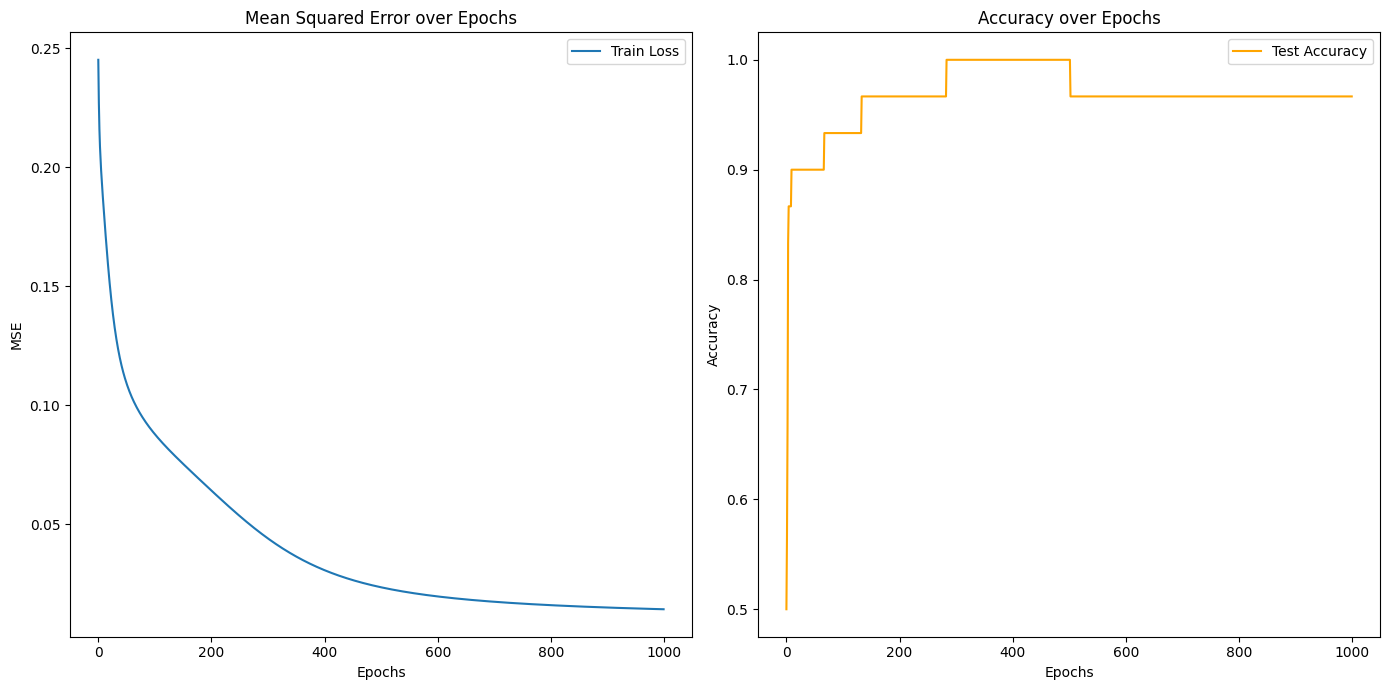

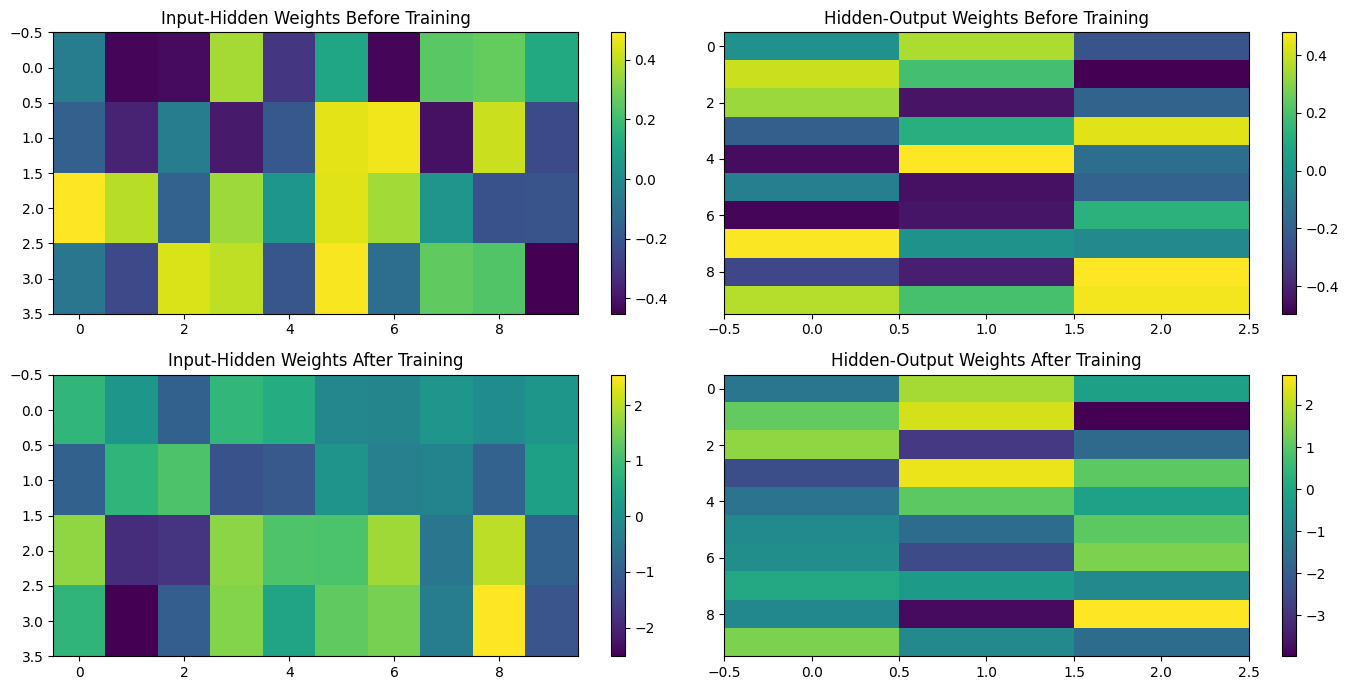


--- Evaluation ---
Test Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-hot encoding for the labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 10  # Number of neurons in the hidden layer
output_size = y_train.shape[1]  # Number of output classes
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size) - 0.5
bias_hidden = np.random.rand(hidden_size) - 0.5
weights_hidden_output = np.random.rand(hidden_size, output_size) - 0.5
bias_output = np.random.rand(output_size) - 0.5

# Save initial weights for visualization
initial_weights_input_hidden = weights_input_hidden.copy()
initial_weights_hidden_output = weights_hidden_output.copy()

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feedforward(X):
    global hidden_input, hidden_output, final_input, final_output
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    return final_output

# Backpropagation function
def backpropagation(X, y):
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
    # Calculate errors
    output_error = final_output - y
    output_delta = output_error * sigmoid_derivative(final_output)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, output_delta)
    bias_output -= learning_rate * np.sum(output_delta, axis=0)

    weights_input_hidden -= learning_rate * np.dot(X.T, hidden_delta)
    bias_hidden -= learning_rate * np.sum(hidden_delta, axis=0)

    return np.mean(np.square(output_error))  # Mean squared error

# Training the neural network
train_errors = []
test_accuracies = []

for epoch in range(epochs):
    # Feedforward and backpropagation
    feedforward(X_train)
    train_loss = backpropagation(X_train, y_train)
    train_errors.append(train_loss)

    # Evaluate on test data
    test_predictions = feedforward(X_test)
    test_accuracy = np.mean(np.argmax(test_predictions, axis=1) == np.argmax(y_test, axis=1))
    test_accuracies.append(test_accuracy)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

# Save final weights for visualization
final_weights_input_hidden = weights_input_hidden
final_weights_hidden_output = weights_hidden_output

# Plot Mean Squared Error
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_errors, label="Train Loss")
plt.title("Mean Squared Error over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), test_accuracies, label="Test Accuracy", color='orange')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Visualize Weights Before and After Training
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.title("Input-Hidden Weights Before Training")
plt.imshow(initial_weights_input_hidden, cmap="viridis", aspect="auto")
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title("Hidden-Output Weights Before Training")
plt.imshow(initial_weights_hidden_output, cmap="viridis", aspect="auto")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title("Input-Hidden Weights After Training")
plt.imshow(final_weights_input_hidden, cmap="viridis", aspect="auto")
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title("Hidden-Output Weights After Training")
plt.imshow(final_weights_hidden_output, cmap="viridis", aspect="auto")
plt.colorbar()

plt.tight_layout()
plt.show()

# Predict on test data
final_predictions = feedforward(X_test)
predicted_labels = np.argmax(final_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Classification Report
print("\n--- Evaluation ---")
print(f"Test Accuracy: {np.mean(predicted_labels == true_labels):.4f}")
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=iris.target_names))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix = confusion_matrix(true_labels, predicted_labels)
print(confusion_matrix)


4) Optimizers

In [4]:
import numpy as np

def perceptron(x, w, b):
  return np.dot(x, w) + b

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [5]:
def mini_batch_GD(X, Y, w, b, epoch=50, batch_size=100):
  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:
        w = w - eta * dw
        b = b - eta * db

In [6]:
def momentum_GD(X, Y, w, b, epoch=50, batch_size=100, momentum=0.9):
  Hw = 0
  Hb = 0
  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:

        Hw = momentum * Hw + (1 - momentum) * dw
        Hb = momentum * Hb + (1 - momentum) * db


        w = w - eta * Hw
        b = b - eta * Hb

In [7]:
def NAGD(X, Y, w, b, epoch=50, batch_size=100, momentum=0.9):
  Hw, Hb, dw, db = 0, 0, 0, 0
  beta = 0.95

  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:

        Hw = beta * Hw + (1 - beta) * dw
        Hb = beta * Hb + (1 - beta) * db


        w = w - eta * (Hw - beta * Hb)
        b = b - eta * (Hb - beta * Hw)

In [8]:
def AdaGrad(X, Y, w, b, epoch=50, batch_size=100, eta=0.01, epsilon=1e-8):
  Hw = 0
  Hb = 0

  for i in range(epoch):
    for x, y in zip(X, Y):
      yin = perceptron(x, w, b)
      y_hat = sigmoid(yin)
      dw += c * (y - y_hat) * (1 - y_hat) * x
      db += c * (y - y_hat) * (1 - y_hat)
      sample_batch += 1
      if sample_batch % batch_size == 0:

        Hw += dw**2
        Hb += db**2


        w -= eta * dw / (np.sqrt(Hw) + epsilon)
        b -= eta * db / (np.sqrt(Hb) + epsilon)

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu', kernel_initializer='random_normal'),
        Dense(10, activation='softmax', kernel_initializer='random_normal')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:

optimizers = {
    'SGD': SGD(),
    'SGD with Momentum': SGD(momentum=0.9),
    'Mini-Batch Gradient Descent': SGD(),
    'Adagrad': Adagrad(),
    'RMSProp': RMSprop(),
    'Adadelta': Adadelta(),
    'Adam': Adam()
}


results = {}
history_data = {}


for name, optimizer in optimizers.items():
    print(f"Training with optimizer: {name}")

    model = create_model(optimizer)

    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results[name] = {
        'test_loss': test_loss,
        'test_accuracy': test_acc
    }

    history_data[name] = history


Training with optimizer: SGD


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with optimizer: SGD with Momentum
Training with optimizer: Mini-Batch Gradient Descent
Training with optimizer: Adagrad
Training with optimizer: RMSProp
Training with optimizer: Adadelta
Training with optimizer: Adam


In [13]:

results_df = pd.DataFrame(results).T[['test_loss', 'test_accuracy']]
print(results_df)


                             test_loss  test_accuracy
SGD                           0.269360         0.9252
SGD with Momentum             0.092873         0.9729
Mini-Batch Gradient Descent   0.264258         0.9251
Adagrad                       0.527291         0.8764
RMSProp                       0.089289         0.9749
Adadelta                      1.975561         0.5786
Adam                          0.083307         0.9745


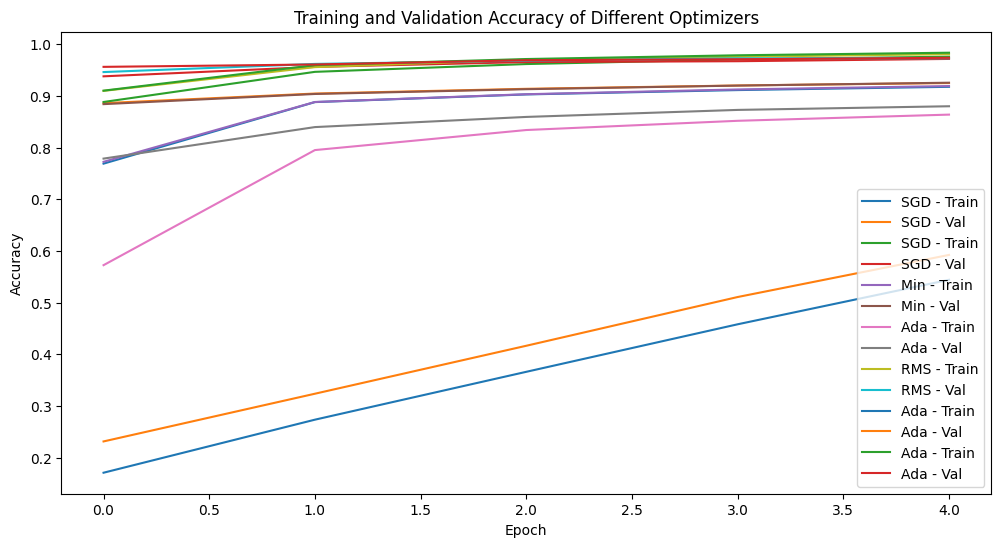

In [14]:
plt.figure(figsize=(12, 6))
for name, history in history_data.items():
    plt.plot(history.history['accuracy'], label=f'{name[:3]} - Train')
    plt.plot(history.history['val_accuracy'], label=f'{name[:3]} - Val')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Different Optimizers')
plt.legend(loc='lower right')
plt.show()

ML2 Backup codes

1) Boolean Gates using Perceptron

In [15]:
import numpy as np

def yin(t):
    return 1 if t >= 0 else 0

def perceptron(x, w, b):
    t = np.dot(w, x) + b
    return yin(t)

# AND Gate
def AND(x):
    w = np.array([1, 1])
    b = -2
    return perceptron(x, w, b)

print("AND Gate:")
print("0 AND 1 =", AND(np.array([0, 1])))
print("1 AND 1 =", AND(np.array([1, 1])))
print("0 AND 0 =", AND(np.array([0, 0])))
print("1 AND 0 =", AND(np.array([1, 0])))

# OR Gate
def OR(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

print("\nOR Gate:")
print("0 OR 1 =", OR(np.array([0, 1])))
print("1 OR 1 =", OR(np.array([1, 1])))
print("0 OR 0 =", OR(np.array([0, 0])))
print("1 OR 0 =", OR(np.array([1, 0])))

# NOT Gate
def NOT(x):
    w = np.array([-1])
    b = 0.5
    return perceptron(x, w, b)

print("\nNOT Gate:")
print("NOT 0 =", NOT(np.array([0])))
print("NOT 1 =", NOT(np.array([1])))

# NOR Gate
def NOR(x):
    w = np.array([-1, -1])
    b = 0.5
    return perceptron(x, w, b)

print("\nNOR Gate:")
print("0 NOR 1 =", NOR(np.array([0, 1])))
print("1 NOR 1 =", NOR(np.array([1, 1])))
print("0 NOR 0 =", NOR(np.array([0, 0])))
print("1 NOR 0 =", NOR(np.array([1, 0])))

# NAND Gate
def NAND(x):
    w = np.array([-1, -1])
    b = 1.5
    return perceptron(x, w, b)

print("\nNAND Gate:")
print("0 NAND 1 =", NAND(np.array([0, 1])))
print("1 NAND 1 =", NAND(np.array([1, 1])))
print("0 NAND 0 =", NAND(np.array([0, 0])))
print("1 NAND 0 =", NAND(np.array([1, 0])))

# XOR Gate
def XOR(x):
    w_nand = np.array([-1, -1])
    b_nand = 1.5
    s1 = perceptron(x, w_nand, b_nand)

    w_or = np.array([1, 1])
    b_or = -0.5
    s2 = perceptron(x, w_or, b_or)

    w_and = np.array([1, 1])
    b_and = -2
    return perceptron(np.array([s1, s2]), w_and, b_and)

print("\nXOR Gate:")
print("0 XOR 1 =", XOR(np.array([0, 1])))
print("1 XOR 1 =", XOR(np.array([1, 1])))
print("0 XOR 0 =", XOR(np.array([0, 0])))
print("1 XOR 0 =", XOR(np.array([1, 0])))

# Display weights and biases
print("\nWeights and Biases:")
print("AND -> Weights:", [1, 1], "Bias:", -2)
print("OR -> Weights:", [1, 1], "Bias:", -0.5)
print("NOT -> Weights:", [-1], "Bias:", 0.5)
print("NOR -> Weights:", [-1, -1], "Bias:", 0.5)
print("NAND -> Weights:", [-1, -1], "Bias:", 1.5)

AND Gate:
0 AND 1 = 0
1 AND 1 = 1
0 AND 0 = 0
1 AND 0 = 0

OR Gate:
0 OR 1 = 1
1 OR 1 = 1
0 OR 0 = 0
1 OR 0 = 1

NOT Gate:
NOT 0 = 1
NOT 1 = 0

NOR Gate:
0 NOR 1 = 0
1 NOR 1 = 0
0 NOR 0 = 1
1 NOR 0 = 0

NAND Gate:
0 NAND 1 = 1
1 NAND 1 = 0
0 NAND 0 = 1
1 NAND 0 = 1

XOR Gate:
0 XOR 1 = 1
1 XOR 1 = 0
0 XOR 0 = 0
1 XOR 0 = 1

Weights and Biases:
AND -> Weights: [1, 1] Bias: -2
OR -> Weights: [1, 1] Bias: -0.5
NOT -> Weights: [-1] Bias: 0.5
NOR -> Weights: [-1, -1] Bias: 0.5
NAND -> Weights: [-1, -1] Bias: 1.5


2) Backpropagation

Epoch 0, MSE: 0.3057, Accuracy: 0.0583
Epoch 100, MSE: 0.0146, Accuracy: 0.9750
Epoch 200, MSE: 0.0117, Accuracy: 0.9833
Epoch 300, MSE: 0.0109, Accuracy: 0.9833
Epoch 400, MSE: 0.0106, Accuracy: 0.9833
Epoch 500, MSE: 0.0104, Accuracy: 0.9833
Epoch 600, MSE: 0.0103, Accuracy: 0.9833
Epoch 700, MSE: 0.0102, Accuracy: 0.9833
Epoch 800, MSE: 0.0101, Accuracy: 0.9833
Epoch 900, MSE: 0.0101, Accuracy: 0.9833


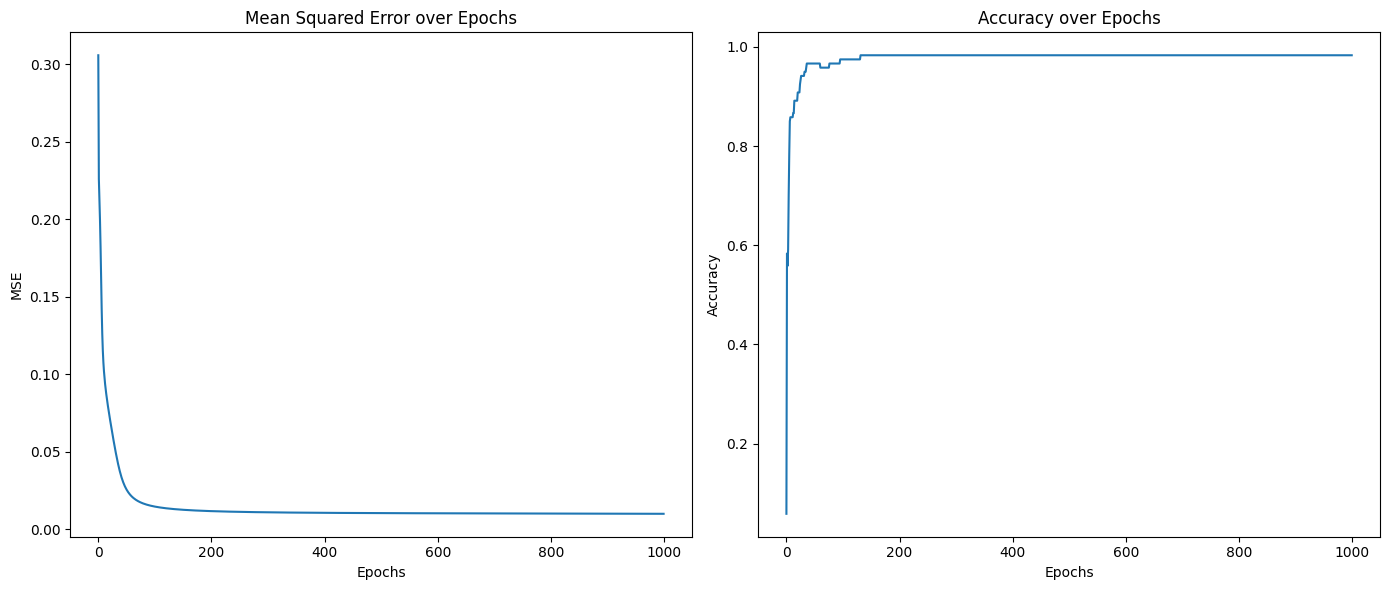

Test Accuracy: 1.0000


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize parameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]
learning_rate = 0.1
epochs = 1000

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Feedforward function
def feedforward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return output, a1

# Backpropagation function
def backprop(X, y, output, a1):
    global W1, W2, b1, b2
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    a1_error = np.dot(output_delta, W2.T)
    a1_delta = a1_error * sigmoid_derivative(a1)

    W2 += np.dot(a1.T, output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(X.T, a1_delta) * learning_rate
    b1 += np.sum(a1_delta, axis=0, keepdims=True) * learning_rate

# Training loop
mse_list = []
accuracy_list = []

for epoch in range(epochs):
    output, a1 = feedforward(X_train)
    mse = mean_squared_error(y_train, output)
    mse_list.append(mse)

    predictions = np.argmax(output, axis=1)
    accuracy = np.mean(predictions == np.argmax(y_train, axis=1))
    accuracy_list.append(accuracy)

    backprop(X_train, y_train, output, a1)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, MSE: {mse:.4f}, Accuracy: {accuracy:.4f}')

# Plot Mean Squared Error and Accuracy
plt.figure(figsize=(14, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title('Mean Squared Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(accuracy_list)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Evaluate on test data
output_test, _ = feedforward(X_test)
test_predictions = np.argmax(output_test, axis=1)
test_accuracy = np.mean(test_predictions == np.argmax(y_test, axis=1))

print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/1000
MSE: 0.4959, Accuracy: 0.2857
Epoch 101/1000
MSE: 0.1184, Accuracy: 0.8095
Epoch 201/1000
MSE: 0.0839, Accuracy: 0.8762
Epoch 301/1000
MSE: 0.0611, Accuracy: 0.9333
Epoch 401/1000
MSE: 0.0442, Accuracy: 0.9524
Epoch 501/1000
MSE: 0.0333, Accuracy: 0.9619
Epoch 601/1000
MSE: 0.0269, Accuracy: 0.9619
Epoch 701/1000
MSE: 0.0231, Accuracy: 0.9524
Epoch 801/1000
MSE: 0.0207, Accuracy: 0.9524
Epoch 901/1000
MSE: 0.0190, Accuracy: 0.9524


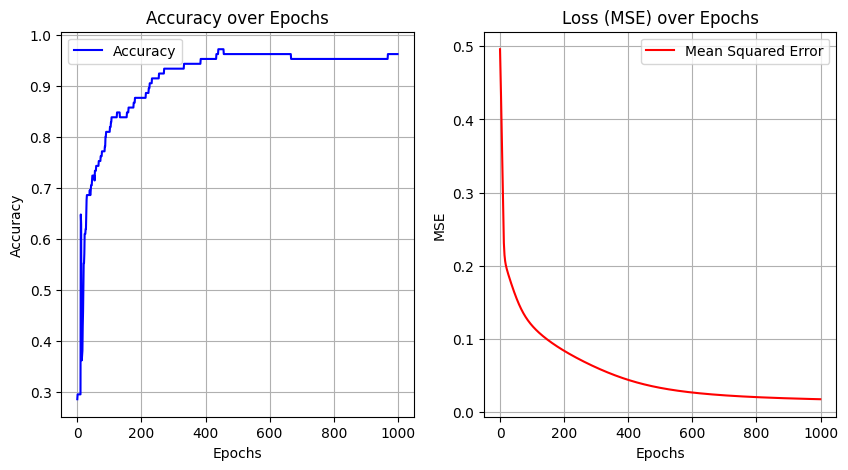

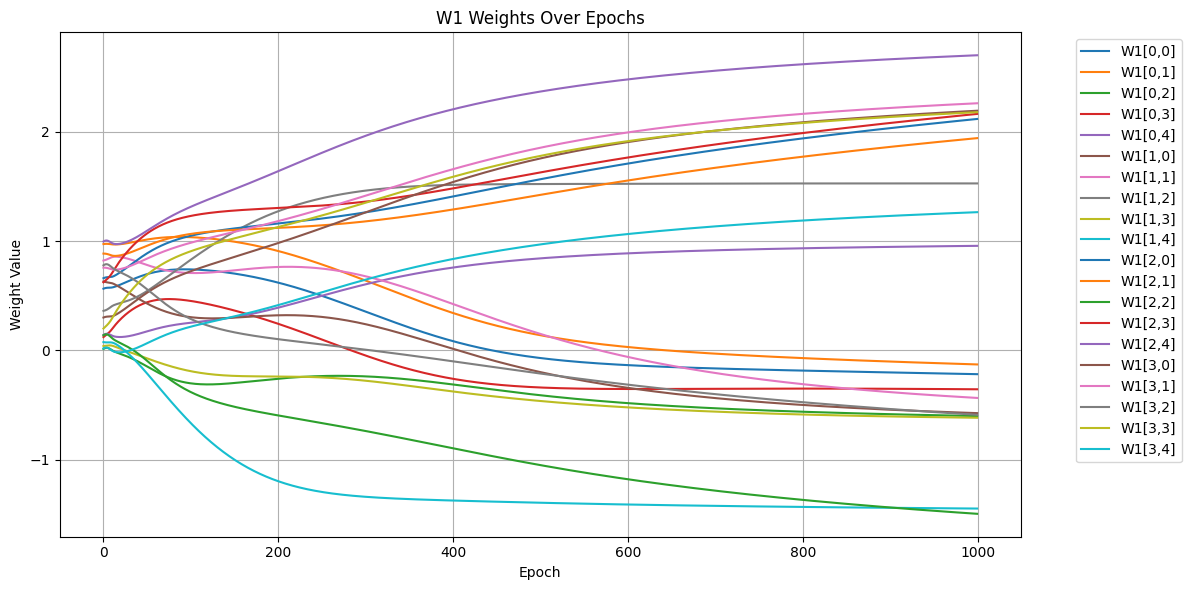

Test Accuracy: 1.0000


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.rand(input_size, hidden_size)
    W2 = np.random.rand(hidden_size, output_size)
    b1 = np.random.rand(1, hidden_size)
    b2 = np.random.rand(1, output_size)
    return W1, W2, b1, b2

def forward_propagation(X, W1, W2, b1, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, Z1, A1, A2, W2):
    error = y - A2
    dZ2 = error * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    return dW1, dW2, db1, db2, error

W1, W2, b1, b2 = initialize_weights(input_size, hidden_size, output_size)

learning_rate = 0.01
epochs = 1000
mse_history = []
accuracy_history = []
W1_history = []
W2_history = []

for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, W2, b1, b2)
    dW1, dW2, db1, db2, error = backward_propagation(X_train, y_train, Z1, A1, A2, W2)
    mse = np.mean(np.square(error))
    mse_history.append(mse)

    W1 += learning_rate * dW1
    W2 += learning_rate * dW2
    b1 += learning_rate * db1
    b2 += learning_rate * db2

    W1_history.append(W1.copy())
    W2_history.append(W2.copy())

    predictions = np.argmax(A2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == labels)
    accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}')
        print(f'MSE: {mse:.4f}, Accuracy: {accuracy:.4f}')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), accuracy_history, label="Accuracy", color="blue")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), mse_history, label="Mean Squared Error", color="red")
plt.title("Loss (MSE) over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid()
plt.legend()

plt.figure(figsize=(12, 6))
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        plt.plot([W1_history[epoch][i, j] for epoch in range(epochs)], label=f'W1[{i},{j}]')
plt.title("W1 Weights Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

Z1_test, A1_test, Z2_test, A2_test = forward_propagation(X_test, W1, W2, b1, b2)

test_predictions = np.argmax(A2_test, axis=1)
test_labels = np.argmax(y_test, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)

print(f'Test Accuracy: {test_accuracy:.4f}')



3) Optimizer

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import (
    SGD, RMSprop, Adagrad, Adam, Adadelta
)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a simple neural network
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Optimizers to test
optimizers = {
    "SGD": SGD(),
    "SGD with Momentum": SGD(momentum=0.9),
    "Mini-Batch SGD": SGD(),
    "Adagrad": Adagrad(),
    "RMSProp": RMSprop(),
    "AdaDelta": Adadelta(),
    "Adam": Adam()
}

# Training parameters
batch_size = 128
epochs = 5

# Compare optimizers
results = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    results[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Print comparison
print("\nOptimizer Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

Training with SGD...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


SGD Test Accuracy: 0.9115
Training with SGD with Momentum...
SGD with Momentum Test Accuracy: 0.9572
Training with Mini-Batch SGD...
Mini-Batch SGD Test Accuracy: 0.9060
Training with Adagrad...
Adagrad Test Accuracy: 0.8657
Training with RMSProp...
RMSProp Test Accuracy: 0.9699
Training with AdaDelta...
AdaDelta Test Accuracy: 0.4415
Training with Adam...
Adam Test Accuracy: 0.9732

Optimizer Comparison:
SGD: 0.9115
SGD with Momentum: 0.9572
Mini-Batch SGD: 0.9060
Adagrad: 0.8657
RMSProp: 0.9699
AdaDelta: 0.4415
Adam: 0.9732
